In [62]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [63]:
data= pd.read_csv('/content/career_change_prediction_dataset.csv')

In [64]:
data.sample(5)

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
3724,Economics,Business Analyst,21,Female,17,Bachelor's,Medium,5,2,84,...,1,NaN,1,0,0,0,4,0,4,0
5050,Law,Lawyer,52,Female,1,Bachelor's,Medium,7,2,30,...,9,NaN,0,0,0,0,6,2,8,0
35688,Psychology,Mechanical Engineer,31,Female,4,Bachelor's,Medium,9,3,4,...,4,High,1,1,0,0,9,1,7,0
28199,Education,Lawyer,54,Female,30,Bachelor's,Low,8,4,18,...,7,High,0,1,0,0,7,0,8,0
37652,Biology,Artist,40,Female,2,Bachelor's,Low,4,8,80,...,8,High,0,1,0,0,5,2,3,1


In [65]:
print(data.shape)

(38444, 23)


In [66]:
print(data.size)

884212


In [67]:
print(data.columns)

Index(['Field of Study', 'Current Occupation', 'Age', 'Gender',
       'Years of Experience', 'Education Level', 'Industry Growth Rate',
       'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary',
       'Job Security', 'Career Change Interest', 'Skills Gap',
       'Family Influence', 'Mentorship Available', 'Certifications',
       'Freelancing Experience', 'Geographic Mobility',
       'Professional Networks', 'Career Change Events', 'Technology Adoption',
       'Likely to Change Occupation'],
      dtype='object')


In [68]:
print(data.dtypes)

Field of Study                 object
Current Occupation             object
Age                             int64
Gender                         object
Years of Experience             int64
Education Level                object
Industry Growth Rate           object
Job Satisfaction                int64
Work-Life Balance               int64
Job Opportunities               int64
Salary                          int64
Job Security                    int64
Career Change Interest          int64
Skills Gap                      int64
Family Influence               object
Mentorship Available            int64
Certifications                  int64
Freelancing Experience          int64
Geographic Mobility             int64
Professional Networks           int64
Career Change Events            int64
Technology Adoption             int64
Likely to Change Occupation     int64
dtype: object


In [69]:
print(data.isnull().sum())

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64


In [70]:
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [71]:
print(data.isnull().sum())

Field of Study                 0
Current Occupation             0
Age                            0
Gender                         0
Years of Experience            0
Education Level                0
Industry Growth Rate           0
Job Satisfaction               0
Work-Life Balance              0
Job Opportunities              0
Salary                         0
Job Security                   0
Career Change Interest         0
Skills Gap                     0
Family Influence               0
Mentorship Available           0
Certifications                 0
Freelancing Experience         0
Geographic Mobility            0
Professional Networks          0
Career Change Events           0
Technology Adoption            0
Likely to Change Occupation    0
dtype: int64


In [72]:
data.describe(include='all').T

,count,unique,top,freq
Field of Study,38444,10,Medicine,3949
Current Occupation,38444,10,Software Developer,3892
Age,38444,40,24,1028
Gender,38444,2,Female,19299
Years of Experience,38444,40,30,999
Education Level,38444,4,PhD,9777
Industry Growth Rate,38444,3,High,12968
Job Satisfaction,38444,10,6,3971
Work-Life Balance,38444,10,10,3986
Job Opportunities,38444,100,85,429


In [73]:
print(set(data['Field of Study']))
print(set(data['Current Occupation']))
print(set(data['Gender']))
print(set(data['Industry Growth Rate']))
print(set(data['Education Level']))
print(set(data['Family Influence']))

{'Education', 'Law', 'Arts', 'Mechanical Engineering', 'Economics', 'Business', 'Psychology', 'Computer Science', 'Medicine', 'Biology'}
{'Mechanical Engineer', 'Business Analyst', 'Lawyer', 'Artist', 'Teacher', 'Economist', 'Biologist', 'Psychologist', 'Doctor', 'Software Developer'}
{'Male', 'Female'}
{'High', 'Low', 'Medium'}
{"Bachelor's", 'PhD', "Master's", 'High School'}
{'High', 'Low', 'Medium'}


In [74]:
education_mapping = {level: i for i, level in enumerate(sorted(set(data['Education Level'])))}
family_mapping = {influence: i for i, influence in enumerate(sorted(set(data['Family Influence'])))}
job_satisfaction_mapping = {satisfaction: i for i, satisfaction in enumerate(sorted(set(data['Job Satisfaction'])))}
industry_growth_mapping = {rate: i for i, rate in enumerate(sorted(set(data['Industry Growth Rate'])))}
gender_mapping = {gender: i for i, gender in enumerate(sorted(set(data['Gender'])))}
occupation_mapping = {occupation: i for i, occupation in enumerate(sorted(set(data['Current Occupation'])))}
field_mapping = {field: i for i, field in enumerate(sorted(set(data['Field of Study'])))}

# Replace categorical columns with numerical representations
data['Education Level'] = data['Education Level'].map(education_mapping)
data['Family Influence'] = data['Family Influence'].map(family_mapping)
data['Job Satisfaction'] = data['Job Satisfaction'].map(job_satisfaction_mapping)
data['Industry Growth Rate'] = data['Industry Growth Rate'].map(industry_growth_mapping)
data['Gender'] = data['Gender'].map(gender_mapping)
data['Current Occupation'] = data['Current Occupation'].map(occupation_mapping)
data['Field of Study'] = data['Field of Study'].map(field_mapping)

In [75]:
y=data['Likely to Change Occupation']
print("THE TARGET VAIRIABLE")
print(y)

THE TARGET VAIRIABLE
0        0
1        0
2        0
3        0
4        1
        ..
38439    1
38440    1
38441    1
38442    0
38443    0
Name: Likely to Change Occupation, Length: 38444, dtype: object


In [76]:
print(set(y))

{0, 1}


In [77]:
class_0_count = len(data[data['Likely to Change Occupation'] == 0])
class_1_count = len(data[data['Likely to Change Occupation'] == 1])
print(f'Number of rows with target variable equal to 0: {class_0_count}')
print(f'Number of rows with target variable equal to 1: {class_1_count}')

Number of rows with target variable equal to 0: 16279
Number of rows with target variable equal to 1: 22165


In [78]:
x=data.drop('Likely to Change Occupation',axis=1)
print("FEATURES")
x.sample(5)

FEATURES


,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption
27884,7,8,44,1,23,1,0,3,3,2,...,0,8,0,1,0,0,0,8,0,9
33708,9,7,35,0,11,2,2,0,2,82,...,1,9,0,0,0,0,0,10,1,9
1975,5,1,40,0,2,2,1,4,9,94,...,1,7,0,1,1,0,0,3,1,7
4755,6,5,50,1,1,3,1,7,3,70,...,0,7,0,1,0,0,0,8,0,6
36055,4,2,49,1,8,3,0,8,9,96,...,1,1,1,0,0,1,0,1,0,1


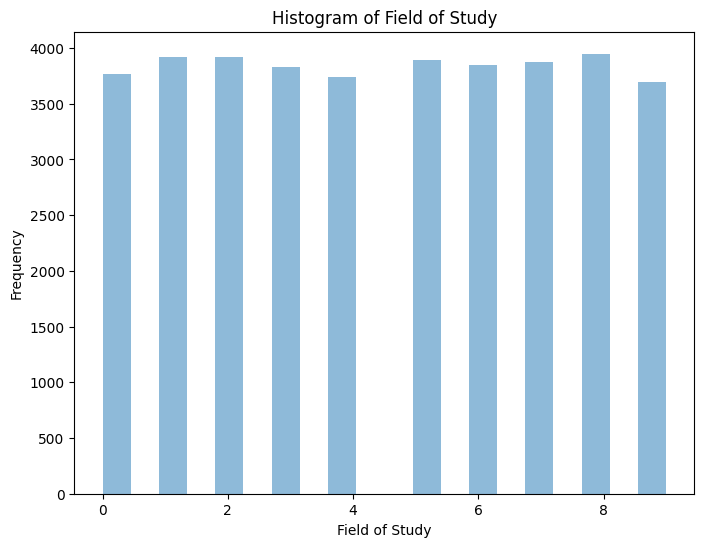

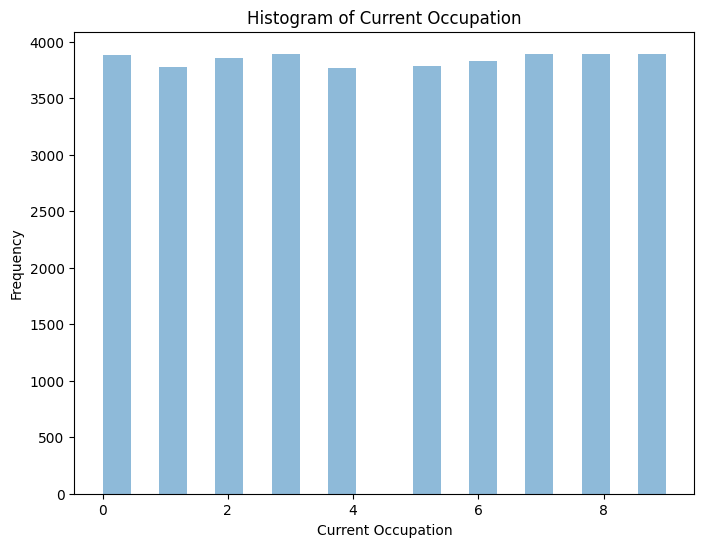

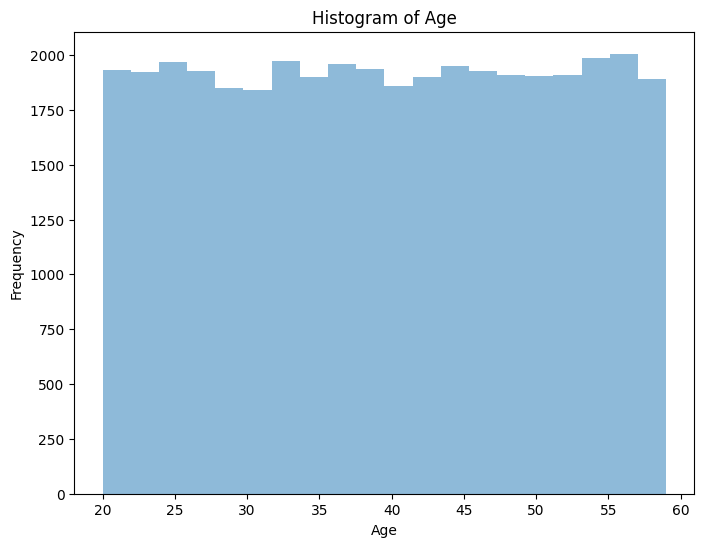

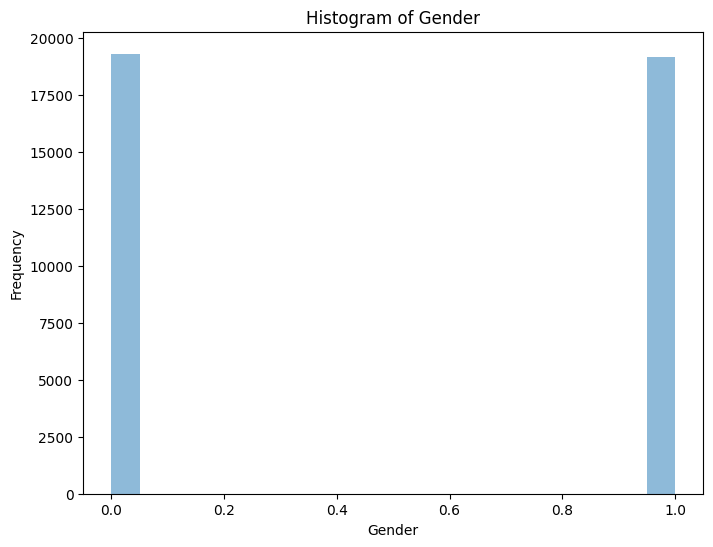

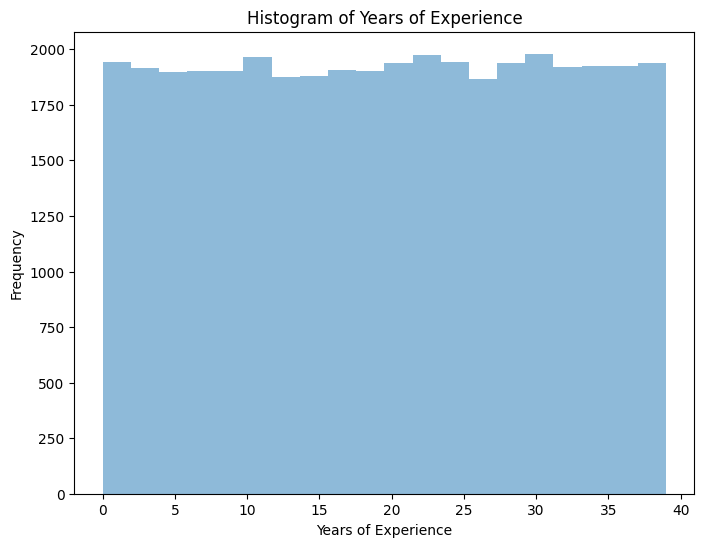

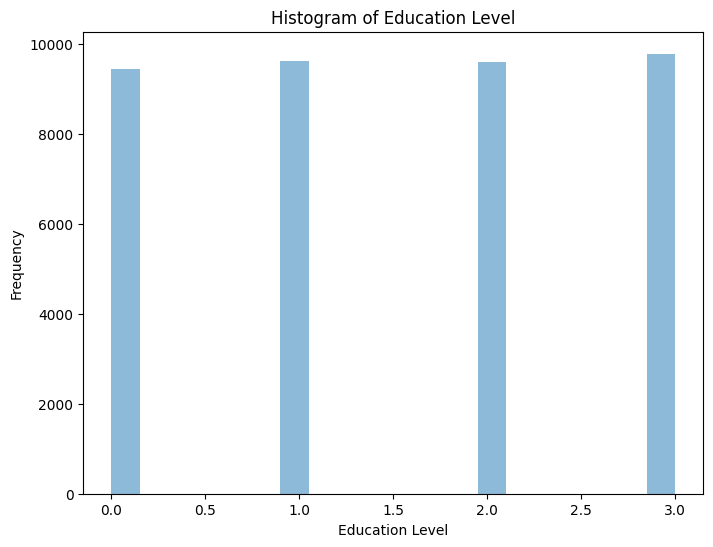

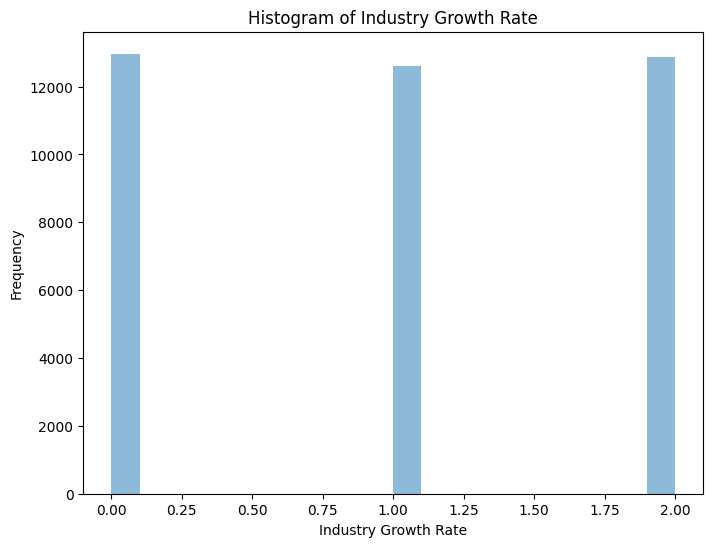

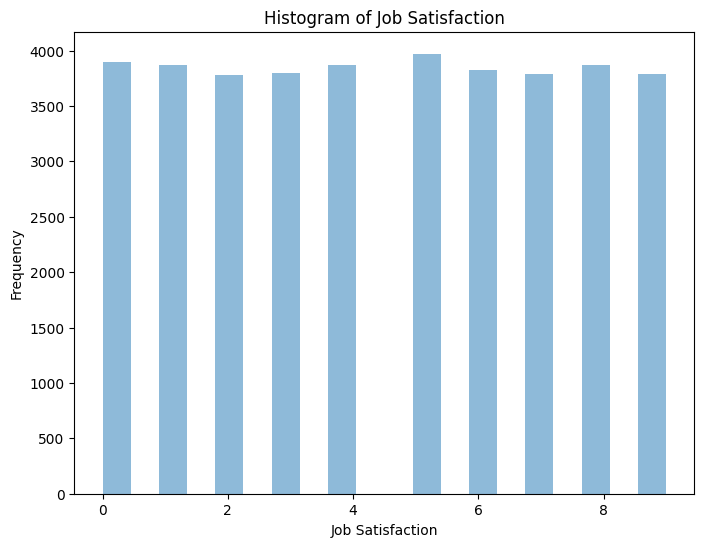

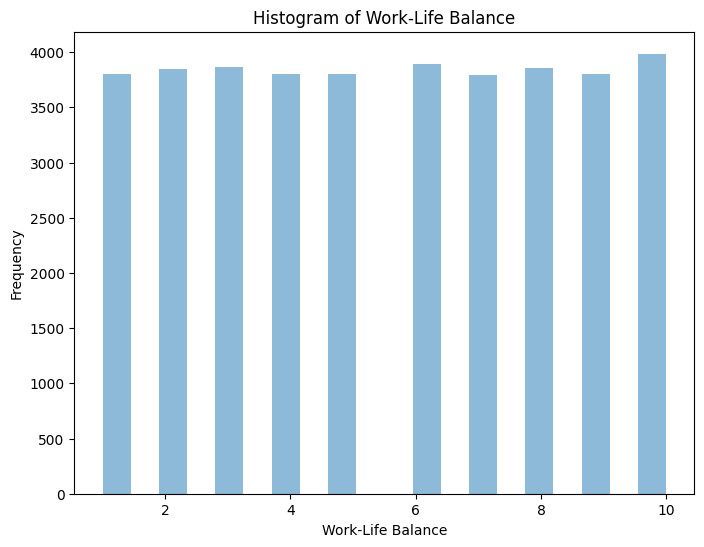

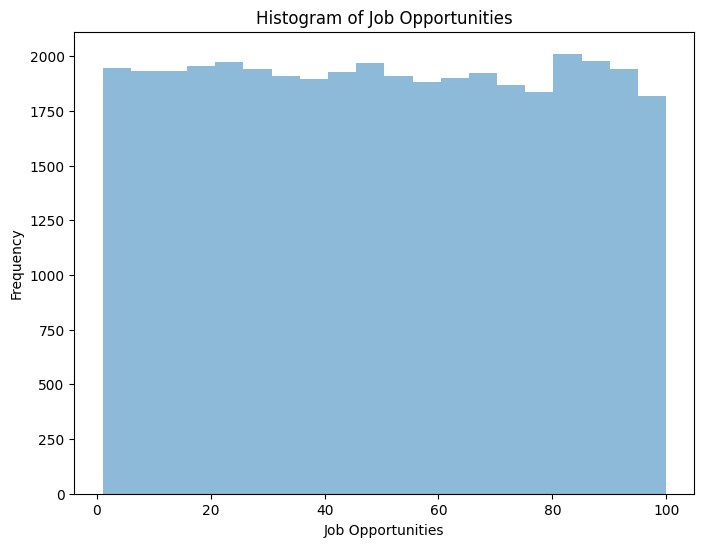

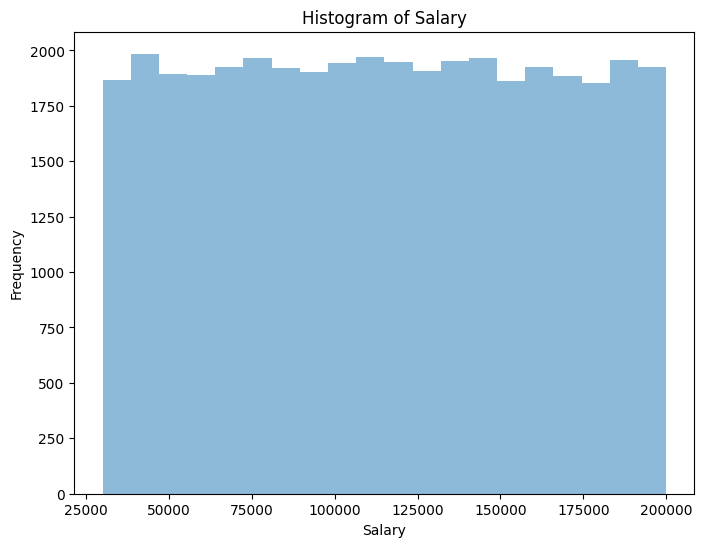

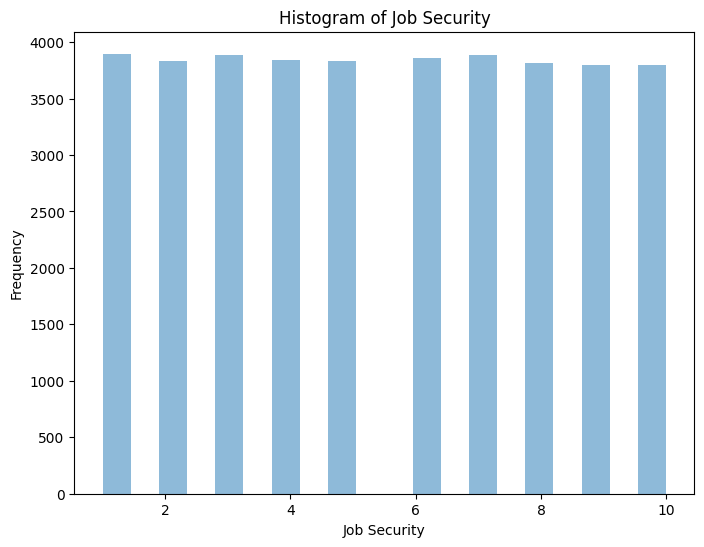

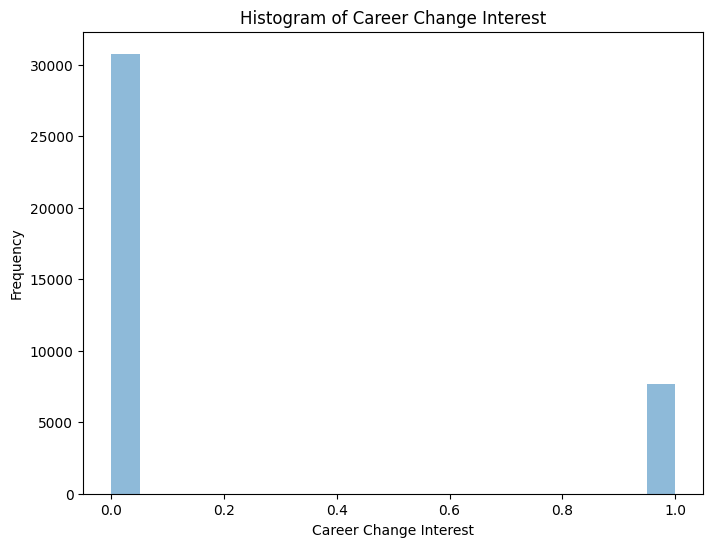

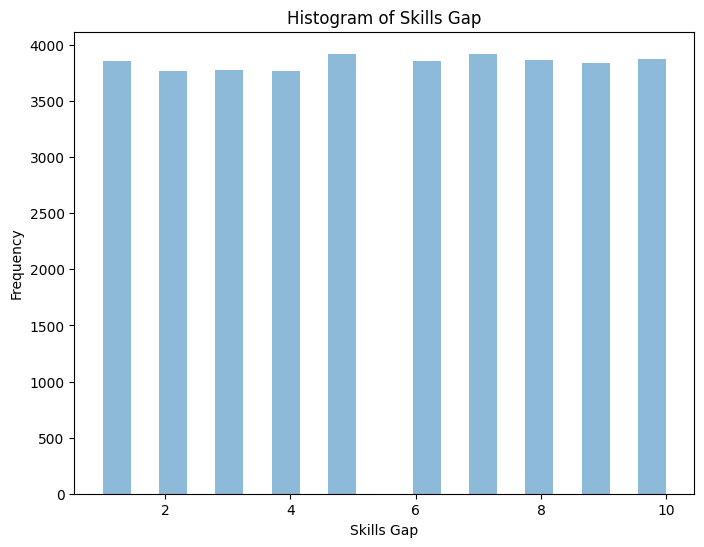

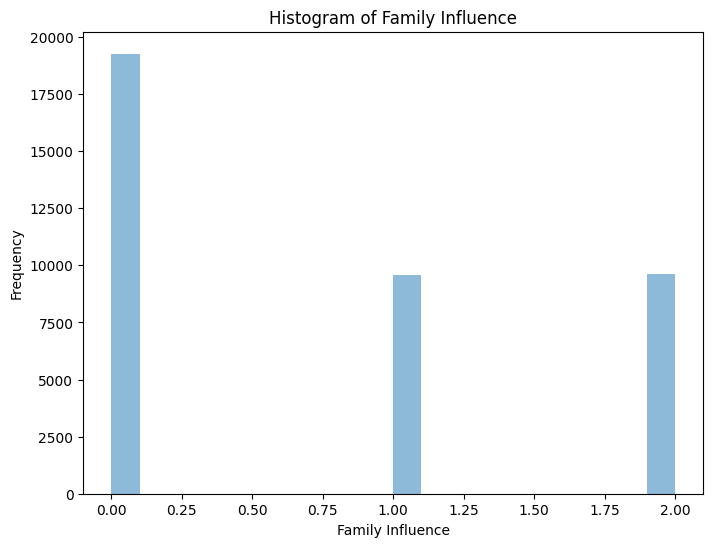

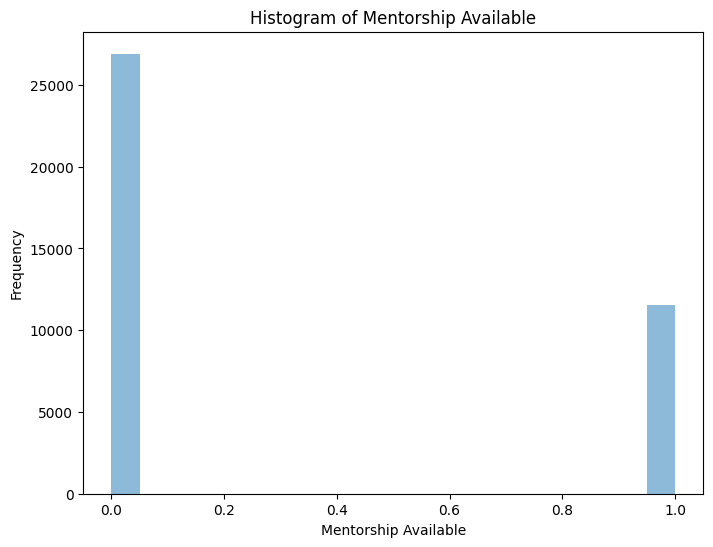

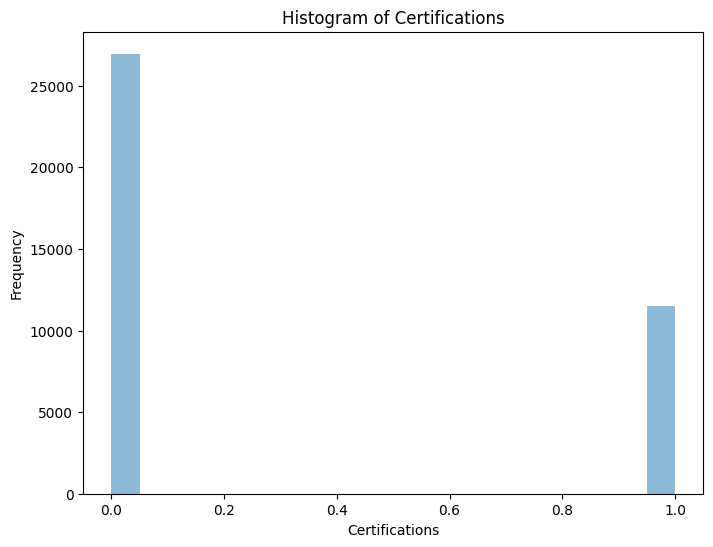

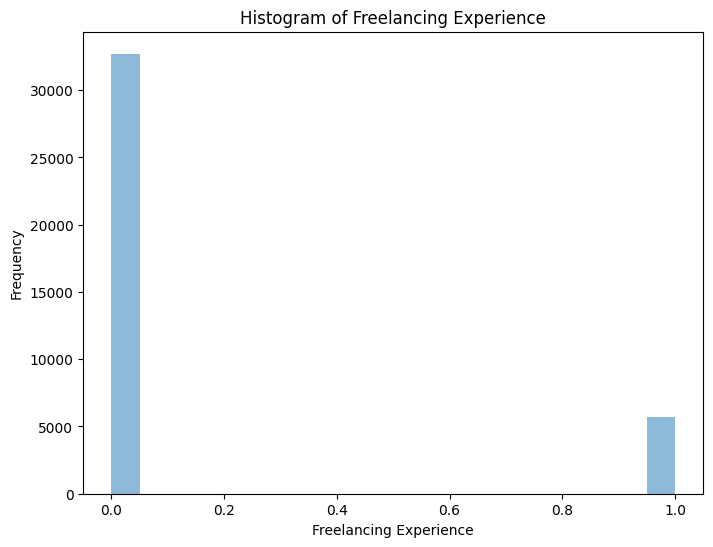

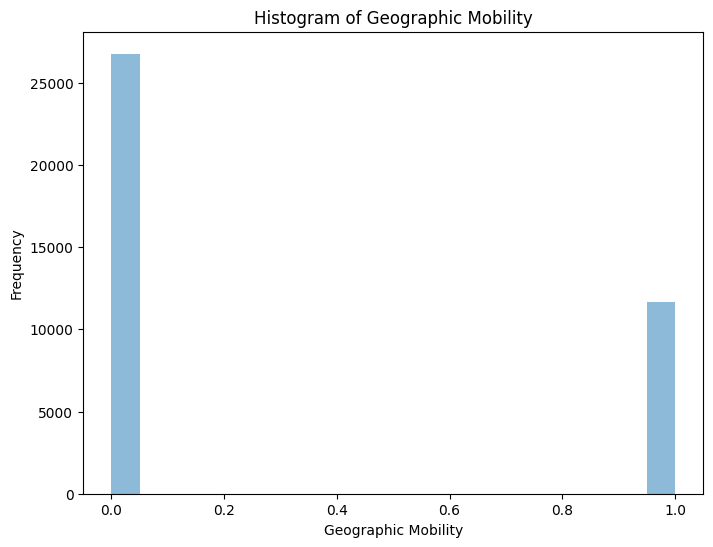

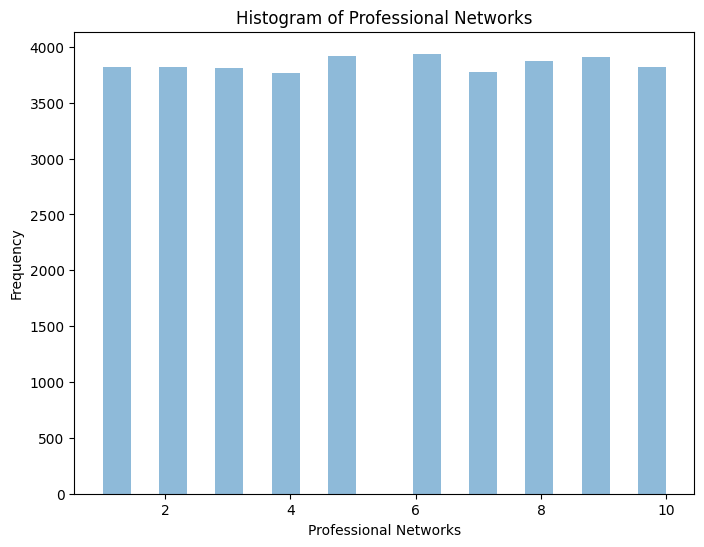

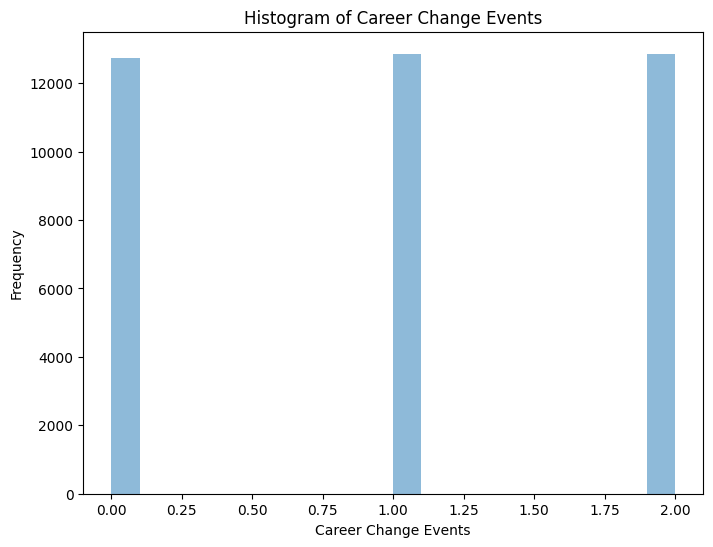

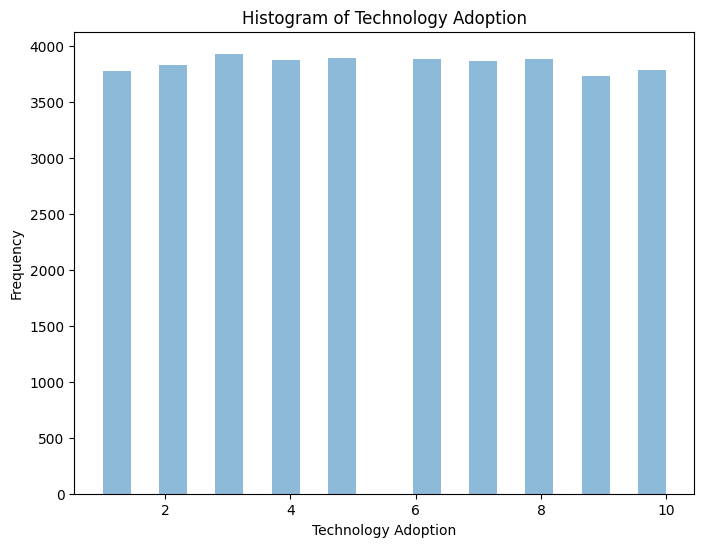

In [79]:
for feature in x.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(x[feature], bins=20, alpha=0.5)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [81]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(26910, 22) (26910,)
(11534, 22) (11534,)


In [82]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [83]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [84]:
#knn model
k_values = [1,3,5,7,9,11,13,15,17,19,21]
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.7969481532859373, 0.8359632391191261, 0.8567712848968267, 0.8685625108375239, 0.8759320270504595, 0.8813074388763655, 0.8859025489856077, 0.8898907577596671, 0.8946592682503901, 0.8974336743540836, 0.8982139760707474]


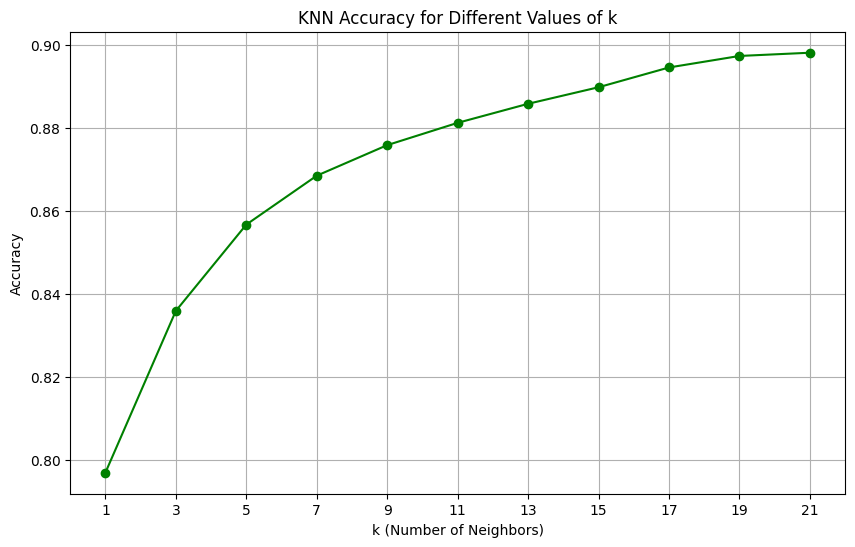

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='g')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [87]:
best_k =  21 # The value of k you have chosen

knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using knn model with k={best_k}: {accuracy}")

print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy using knn model with k=21: 0.8982139760707474

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4926
           1       0.94      0.88      0.91      6608

    accuracy                           0.90     11534
   macro avg       0.89      0.90      0.90     11534
weighted avg       0.90      0.90      0.90     11534



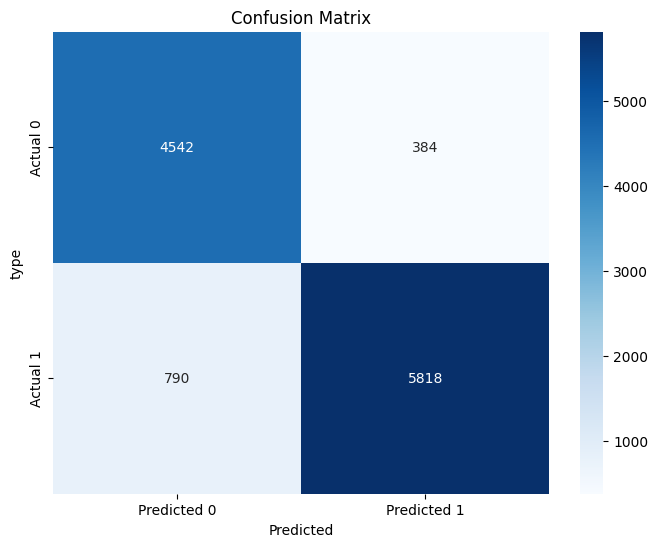

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()


In [89]:
#svm model
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using svm:', accuracy)

Accuracy using svm: 0.9739032425871337


In [90]:
svm_report=classification_report(y_test, y_pred,zero_division=0)

print("SVM Classification Report:\n",svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4926
           1       0.97      0.98      0.98      6608

    accuracy                           0.97     11534
   macro avg       0.97      0.97      0.97     11534
weighted avg       0.97      0.97      0.97     11534



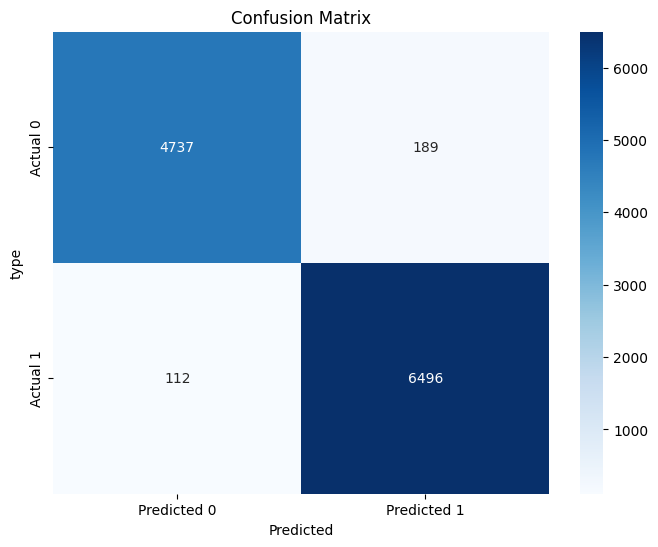

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#logistic regression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using logistic regression:', accuracy)

Accuracy using logistic regression: 0.9011617825559216


In [93]:
print('\nlogistic regression Classification Report:')
print(classification_report(y_test, y_pred))


logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4926
           1       0.92      0.90      0.91      6608

    accuracy                           0.90     11534
   macro avg       0.90      0.90      0.90     11534
weighted avg       0.90      0.90      0.90     11534



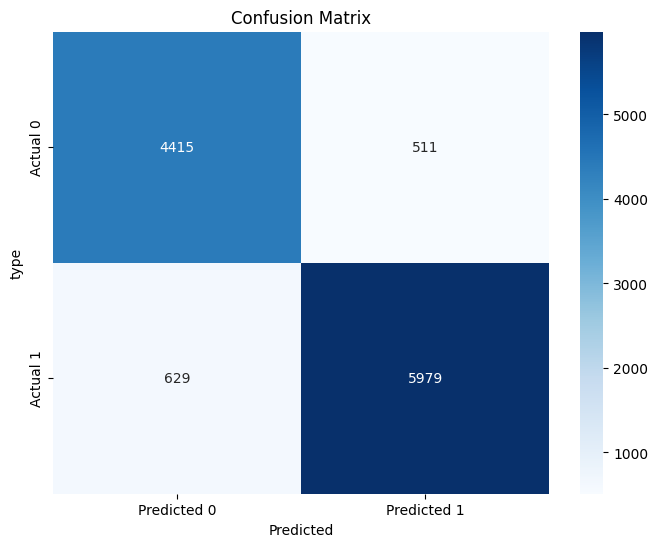

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()